<a href="https://colab.research.google.com/github/ancantos99/g6_aprendizajeautomaticoico_s3/blob/main/colab/g6_aprendizajeautomaticoico_s3_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Parte 1: Preparación del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from wordcloud import WordCloud

In [5]:
#parte 2.- Cargar el Dataset
df = pd.read_csv("https://raw.githubusercontent.com/ancantos99/g6_aprendizajeautomaticoico_s3/refs/heads/main/dataset/dataset_procesado.csv")
print (df.head())
print(df.shape)

#NORMAILIZAR DATOS PARA CLUSTERING
columnas = ['Impresiones', 'Clicks', 'CostoxClick', 'TasaClicks']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[columnas])

           TerminoBusqueda                    Match type  Impresiones  Clicks  \
0                  copilot                   Broad match         2060      47   
1  inteligencia artificial                   Broad match          694      20   
2              blackbox ai  Phrase match (close variant)          670      25   
3                  copilot                   Broad match          388       2   
4  inteligência artificial                   Broad match          312      23   

   CostoxClick            Keyword  TasaClicks  
0         0.10          coding ai    0.022816  
1         0.24        ai programs    0.028818  
2         0.20        ai software    0.037313  
3         0.31  AI software tools    0.005155  
4         0.31        ai programs    0.073718  
(14402, 7)


**Método del codo para encontrar el mejor valor para k**

El mejor valor de K viene determinado por donde comienza a girar la curva, puede ser 4 o 5 en nuestro caso

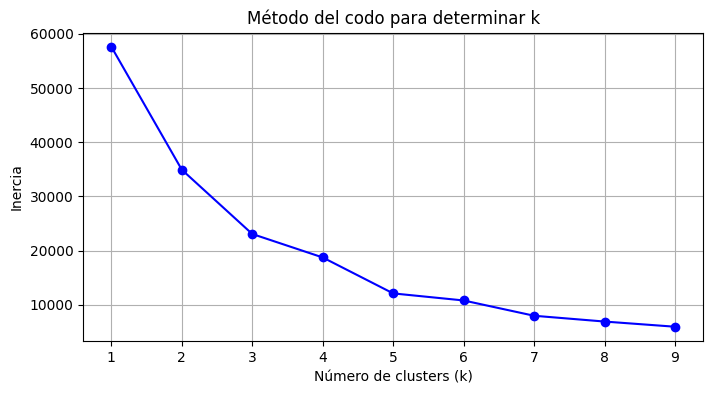

In [6]:
#IMPLEMENTACIÓN DE K-MEANS
#MÉTODO DEL CODO PARA ENCONTRAR EL MEJOR VALOR PARA K
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar k')
plt.grid(True)
plt.show()

**Entrenar el modelo**

unque tanto con k = 4 como con k = 5 tienes un cluster con un solo elemento (Sería un outlier), con k = 5 obtengo una mejor segmentación del resto de los datos, ya que:

- Permite dividir mejor los otros grupos.

- El cluster de un solo elemento se puede tratar como ruido o dato atípico, sin afectar la interpretación de los demás grupos.

In [16]:
# ENTRENAR MODELO CON K = 4 y 5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Ver cuántos elementos hay en cada cluster
print(df['Cluster'].value_counts())

Cluster
0    13084
3      763
1      535
4       19
2        1
Name: count, dtype: int64


**ESTOS RESULTADOS SE PUEDEN INTERPRETAR DE LA SIGUIENTE MANERA**

CLUSTER 3, Tiente más tasa de clicks promedio (PALABRAS O FRASES QUE GENERAN ALTA EFICIENCIA)

CLUSTER 2. Tiene más impresiones y Clicks (PALABRAS O FRASES QUE GENERAN ALTA VISIBILIDAD)

Pero en este Cluster solo hay 1 elemento, por lo que el CLUSTER 4 PODRÍA CONSIDERARLO COMO MI CLUSTER CON MÁS VISIBILIDAD

CLUSTER 1. Tiemen mayor Costo Promedio por Click (PALABRAS MÁS CARAS)

In [18]:
# Promedios por cluster
cluster_summary = df.groupby('Cluster')[['Impresiones', 'Clicks', 'CostoxClick', 'TasaClicks']].mean()
print(cluster_summary)


         Impresiones     Clicks  CostoxClick  TasaClicks
Cluster                                                 
0           1.918374   0.025604     0.002719    0.003919
1          13.869159   1.800000     0.480430    0.366942
2        2060.000000  47.000000     0.100000    0.022816
3           1.314548   1.090433     0.223827    0.913150
4         200.105263  18.105263     0.279474    0.132059
